# Prediction of Car Prices: Linear Regression - Assignment

***

### What is the business objective ?

The company wants to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
* Which variables are significant in predicting the price of a car ?
* How well those variables describe the price of a car  ?

####  Importing the required libraries for EDA

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

#Visualisation
import seaborn as sns             
import matplotlib.pyplot as plt
%matplotlib inline 

# libraries for linear regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

#### Loading the data into dataframe

In [2]:
# Read the cars data file and explore the data
cars_df = pd.read_csv("../datasets/CarPrice_Assignment.csv")
# Display the top 5 rows 
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Display the last 5 rows 
cars_df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


### 1. Data Understanding and Cleaning

In [4]:
# Get total rows and columns
cars_df.shape

(205, 26)

In [5]:
# Understand the columns and data
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# Get an overall idea on the numeric variables
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Remove duplicates if any
cars_df = cars_df.drop_duplicates()
cars_df.shape

(205, 26)

In [8]:
# summing up the missing values (column-wise)
cars_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

- There are no missing values in any of the columns.
- We can directly remove the ```car_id``` as it is unique for each observation and won't help us in our analysis.

In [9]:
# Remove the car_ID as it in unique for each observation
cars_df.drop("car_ID", axis=1, inplace=True)
cars_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Currently, ```CarName``` is comprised of two parts - the first word is the name of ```car company``` and the second is the ```car model```. We need only the car company for the model.

In [10]:
# Getting car company from car name
cars_df["carCompany"] = cars_df.CarName.apply(lambda x: x.split()[0].lower())

In [11]:
# Drop the carName after we get the company or brand name
cars_df.drop("CarName", axis=1, inplace=True)

In [12]:
# Get the unique list of car companies after the splitting
cars_df.carCompany.value_counts()

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
renault         2
maxda           2
vokswagen       1
mercury         1
porcshce        1
toyouta         1
Name: carCompany, dtype: int64

We can see from above list that same car company is represented in multiple spellings and forms, so we need to correct that.
- maxda -> mazda
- porcshce -> porsche
- toyouta -> toyota
- vokswagen, vw -> volkswagen
- alfa-romero -> alfa-romeo

In [13]:
# Replace the wrong company name with correct data
cars_df["carCompany"] = cars_df.carCompany.replace(
        ["maxda", "porcshce", "toyouta", "alfa-romero"],
        ["mazda", "porsche", "toyota", "alfa-romeo"]
)
cars_df["carCompany"] = cars_df.carCompany.replace(["vokswagen", "vw"], "volkswagen")
cars_df.carCompany.value_counts()

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
volvo         11
peugeot       11
dodge          9
bmw            8
buick          8
plymouth       7
audi           7
saab           6
porsche        5
isuzu          4
jaguar         3
alfa-romeo     3
chevrolet      3
renault        2
mercury        1
Name: carCompany, dtype: int64

### 2. EDA and Data Visualisation

<Figure size 7200x7200 with 0 Axes>

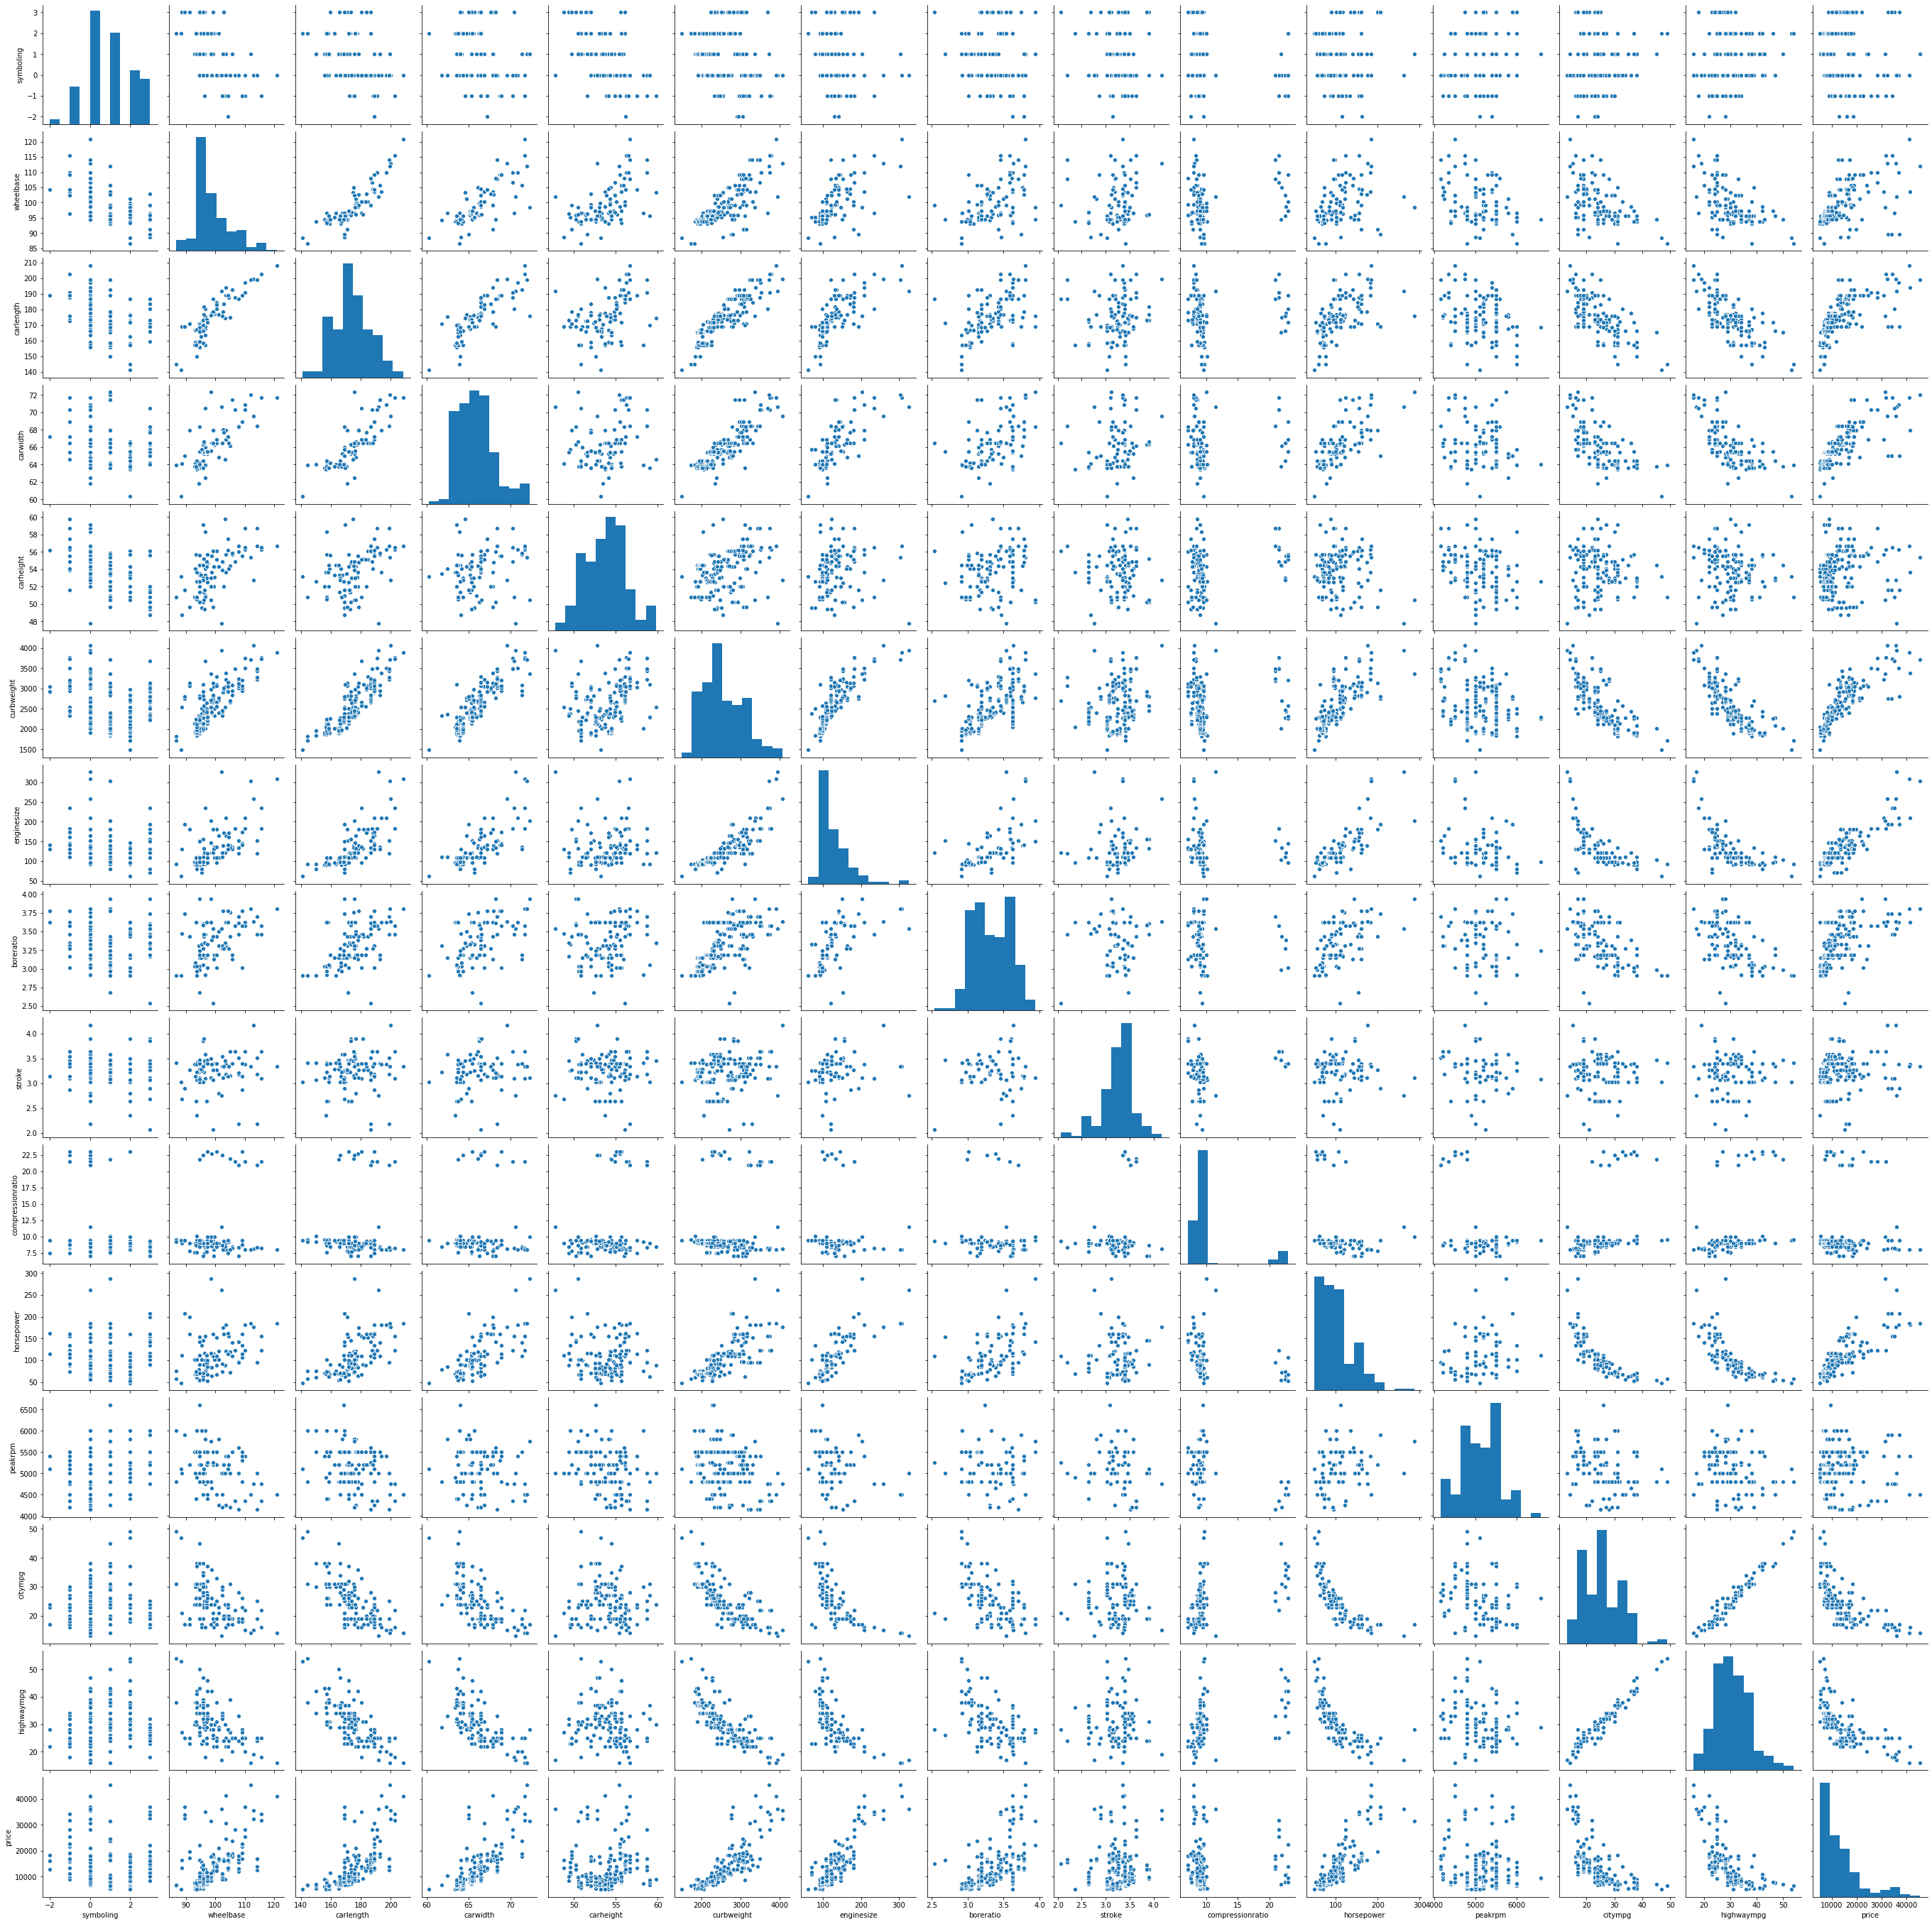

In [14]:
# Create pair plot for all the variables in the car dataset
plt.figure(figsize=(100, 100))
sns.pairplot(cars_df)
plt.show()

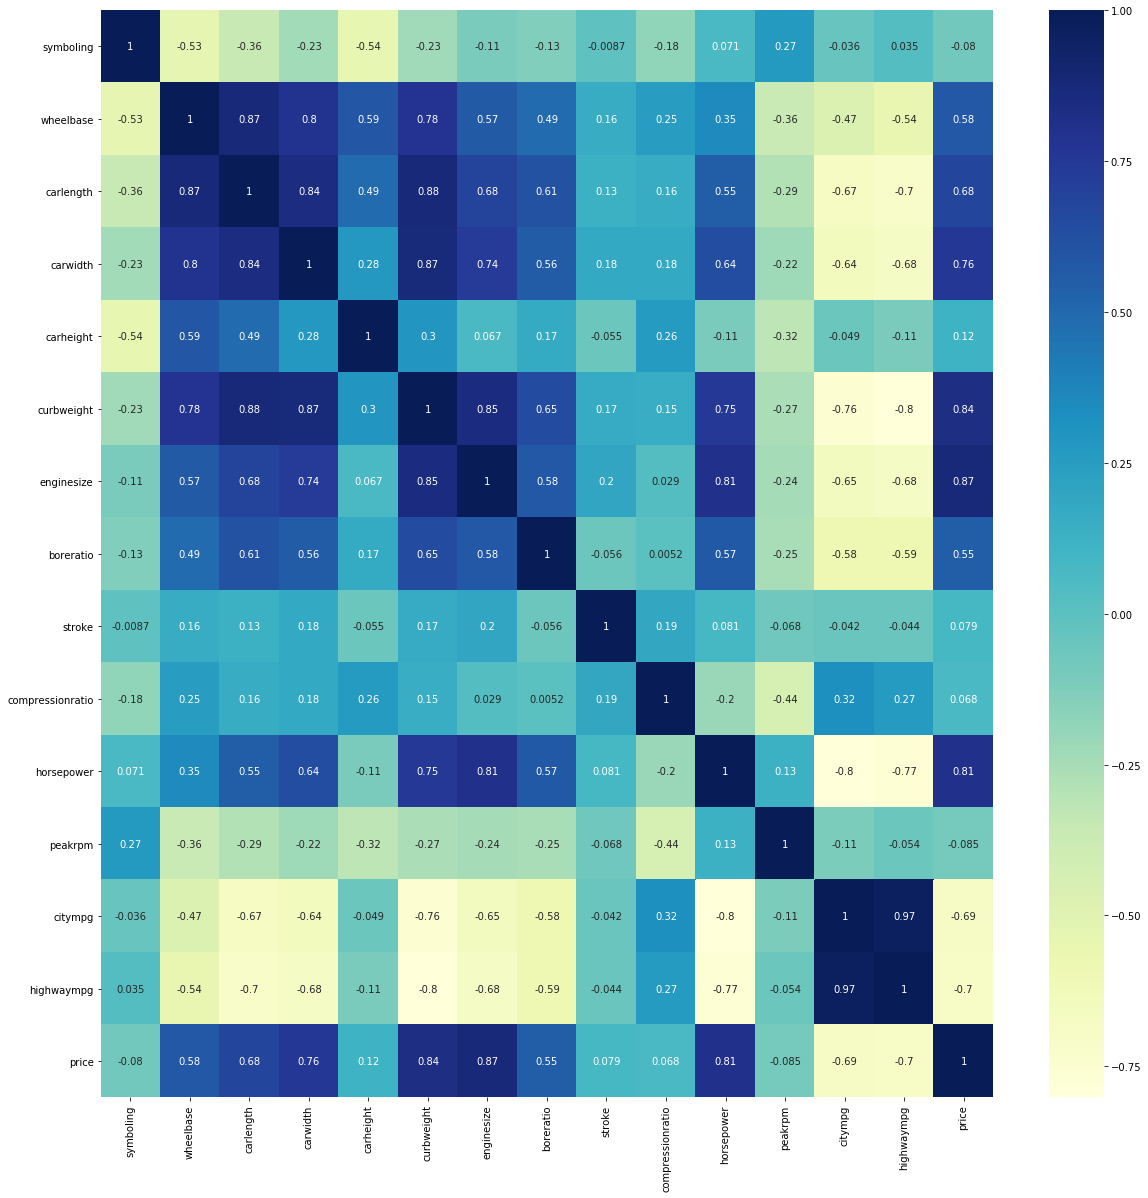

In [15]:
# Getting the correlation between the variables
plt.figure(figsize=(20,20))
sns.heatmap(cars_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

***Observation***
<br>
- From the above heatmap it is clear that ***price*** is highly correlated with ```enginesize```, ```curbweight```, ```horsepower```, ```carwidth``` and ```carlength```.
- It is also negatively correlated with ```symboling```, ```citympg``` and ```highwaympg```.

####  2.1 Univariate Analysis

###### 1. Dependent Variable: Price

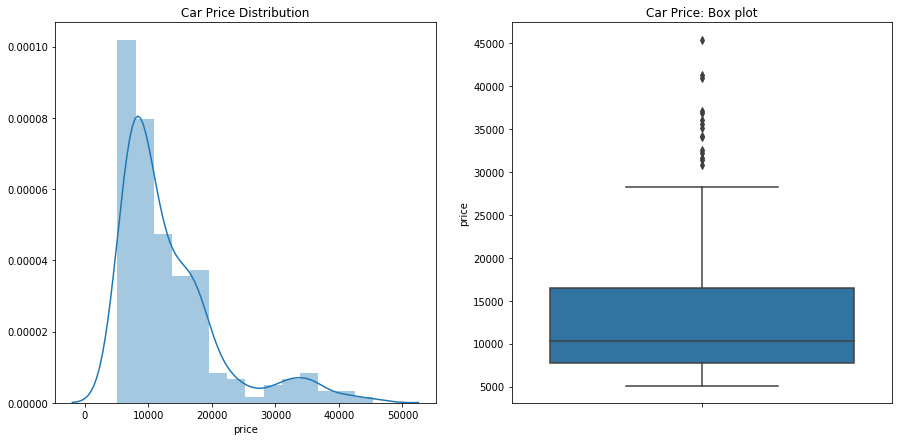

In [16]:
# Get distribution of price in the dataframe
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("Car Price Distribution")
sns.distplot(cars_df.price)
plt.subplot(1, 2, 2)
plt.title("Car Price: Box plot")
sns.boxplot(y="price", data=cars_df)
plt.show()

###### 2. Symboling

In [17]:
# Get distribution of symboling
cars_df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

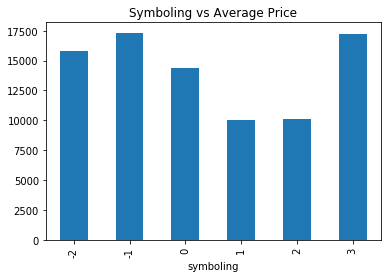

In [18]:
# Get average price of cars across symboling category
plt.title("Symboling vs Average Price")
cars_df.groupby(by="symboling").price.mean().plot.bar()
plt.show()

***Observation***
- For ```-1```, ```-2``` and ```3``` symboling categories has got higher average price.

###### 3. Car Company

In [19]:
# Get distribution of Car name
cars_df.carCompany.value_counts()

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
volvo         11
peugeot       11
dodge          9
bmw            8
buick          8
plymouth       7
audi           7
saab           6
porsche        5
isuzu          4
jaguar         3
alfa-romeo     3
chevrolet      3
renault        2
mercury        1
Name: carCompany, dtype: int64

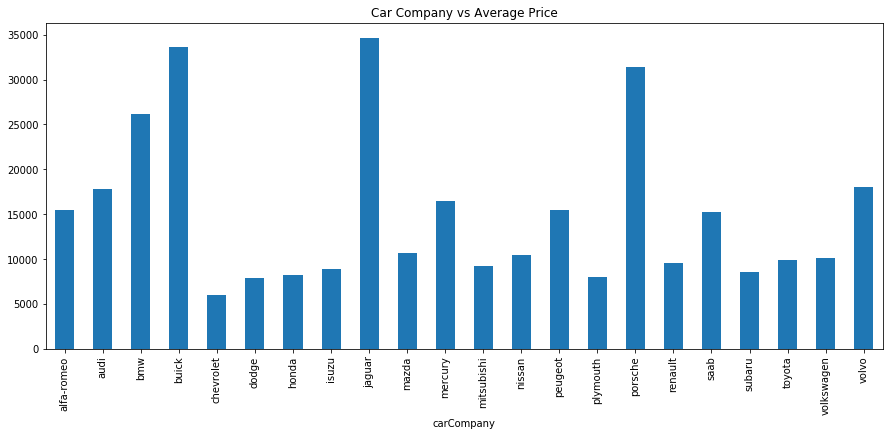

In [20]:
# Get average price of cars across symboling category
plt.figure(figsize=(15,6))
plt.title("Car Company vs Average Price")
cars_df.groupby(by="carCompany").price.mean().plot.bar()
plt.show()

***Observation***
- ```Jaguar```,```Buick``` and ```Porsche``` are the three car companies which has got the highest average price.
- ```Toyotta```, ```Nissan``` and ```Mazda``` has got the maximum of cars in the market.

###### 4. Fuel Type

In [21]:
# Get distribution of Fuel name
cars_df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

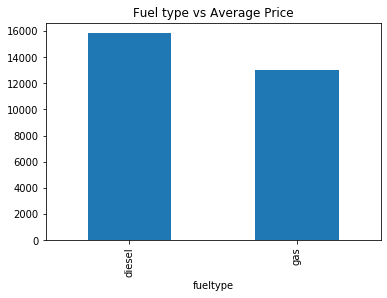

In [22]:
# Get average price across fuel type
plt.title("Fuel type vs Average Price")
cars_df.groupby(by="fueltype").price.mean().plot.bar()
plt.show()

***Observation***
- ```Diesel cars``` are more priced than others.

###### 5. Engine Location

In [23]:
# Get the value counts for enginelocation
cars_df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

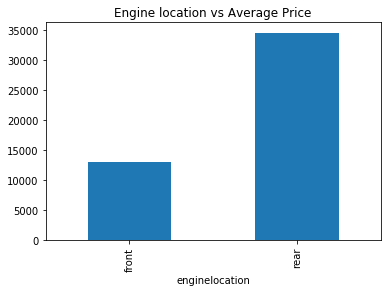

In [24]:
plt.title("Engine location vs Average Price")
cars_df.groupby(by="enginelocation").price.mean().plot.bar()
plt.show()

***Observation***
- Number of observations for ```front``` and  ```rear``` engined models are low, so we can't make a good observation from it.

###### 6. Aspiration

In [25]:
# Get distribution of aspiration
cars_df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

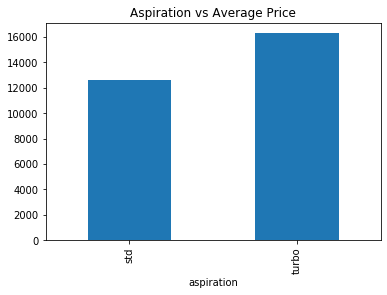

In [26]:
# Get average price across fuel type
plt.title("Aspiration vs Average Price")
cars_df.groupby(by="aspiration").price.mean().plot.bar()
plt.show()

***Observation***
- ```Turbo``` aspirated engines has got more average price compared to other ones, even-though the number of models are less in the market.

###### 7. Door Number

In [27]:
# Get distribution of doornumber
cars_df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

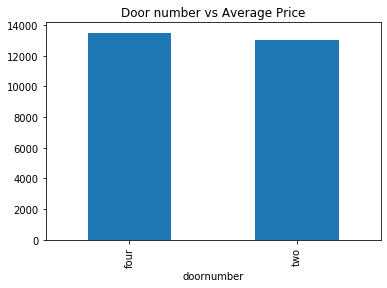

In [28]:
# Get average price across doornumber
plt.title("Door number vs Average Price")
cars_df.groupby(by="doornumber").price.mean().plot.bar()
plt.show()

***Observation***
- The number of doors is not affecting the price of the car significantly.

###### 8. Carbody

In [29]:
# Get distribution of carbody
cars_df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

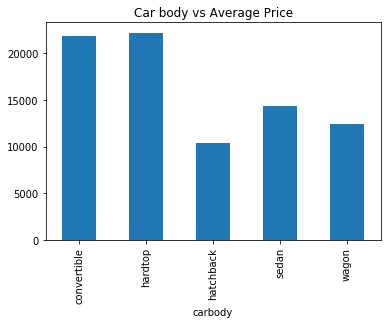

In [30]:
# Get average price across carbody
plt.title("Car body vs Average Price")
cars_df.groupby(by="carbody").price.mean().plot.bar()
plt.show()

***Observation***
- ```Hardtop``` and ```Convertible``` models has got higher average price eventhough they are less in number.
- ```Hatchback``` is the least average priced car even the number of models are high compared to expensive ones.

###### 9. Drive wheel

In [31]:
# Get distribution of drive wheel
cars_df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

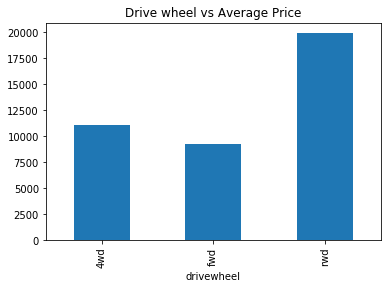

In [32]:
# Get average price across drive wheel
plt.title("Drive wheel vs Average Price")
cars_df.groupby(by="drivewheel").price.mean().plot.bar()
plt.show()

***Observation***
- ```Rear wheel drive``` cars has got higher average price

###### 10. Wheelbase

In [33]:
# Get distribution of wheel base
cars_df.wheelbase.value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
98.4      7
97.3      7
96.3      6
107.9     6
98.8      6
99.1      6
104.3     6
100.4     6
93.1      5
97.2      5
102.4     5
109.1     5
95.9      5
101.2     4
97.0      4
114.2     4
95.3      4
105.8     3
103.5     3
110.0     3
89.5      3
99.8      2
86.6      2
113.0     2
104.5     2
104.9     2
88.6      2
96.9      2
91.3      2
115.6     2
102.9     2
96.1      2
103.3     2
112.0     1
99.5      1
88.4      1
99.2      1
96.0      1
102.0     1
106.7     1
93.0      1
99.4      1
93.3      1
102.7     1
120.9     1
95.1      1
96.6      1
94.3      1
108.0     1
Name: wheelbase, dtype: int64

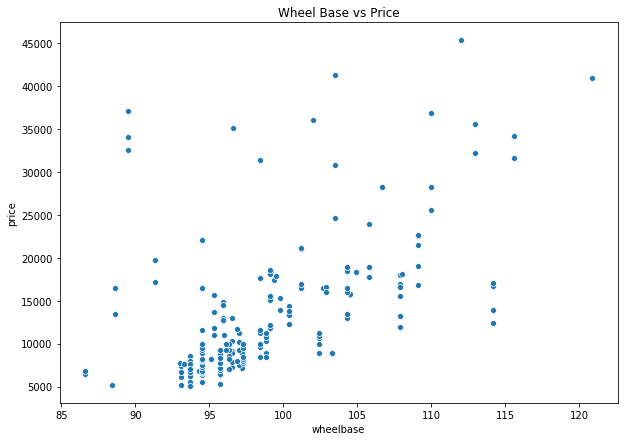

In [34]:
# Get the overall spread of wheel base with price
plt.figure(figsize=(10,7))
plt.title("Wheel Base vs Price")
sns.scatterplot(x="wheelbase", y="price", data=cars_df)
plt.show()

***Observation***
- Most of the cars having wheel base around ```95 to 98```
- Wheelbase has got a decent correlation with price.

###### 11. Car length

In [35]:
# Get distribution of car length
cars_df.carlength.value_counts()

157.3    15
188.8    11
166.3     7
171.7     7
186.7     7
         ..
157.9     1
177.3     1
175.7     1
193.8     1
183.1     1
Name: carlength, Length: 75, dtype: int64

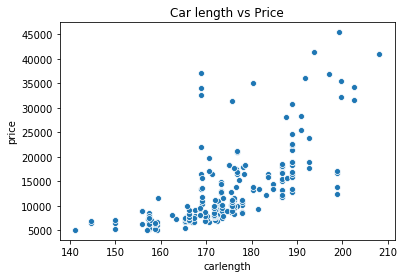

In [36]:
# Get the overall spread of car length with price
plt.title("Car length vs Price")
sns.scatterplot(x="carlength", y="price", data=cars_df)
plt.show()

***Observation***
- Car length is positively correlated with price.

###### 12. Car width

In [37]:
# Get distribution of car width
cars_df.carwidth.value_counts()

63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
66.3     6
64.2     6
67.2     6
65.6     6
67.9     5
66.9     5
68.9     4
64.8     4
65.7     4
65.0     3
63.9     3
71.4     3
71.7     3
70.3     3
64.6     2
64.1     2
67.7     2
66.1     2
68.3     2
69.6     2
61.8     1
72.0     1
68.8     1
62.5     1
66.0     1
63.4     1
70.5     1
72.3     1
68.0     1
70.9     1
66.2     1
66.4     1
60.3     1
70.6     1
66.6     1
Name: carwidth, dtype: int64

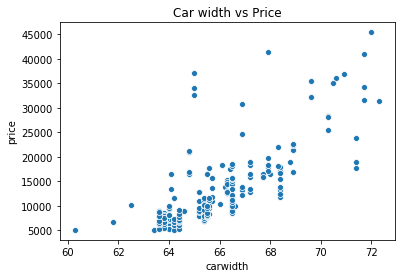

In [38]:
# Get the overall spread of car width with price
plt.title("Car width vs Price")
sns.scatterplot(x="carwidth", y="price", data=cars_df)
plt.show()

***Observation***
- Car width is positively correlated with price.

###### 13. Car Height

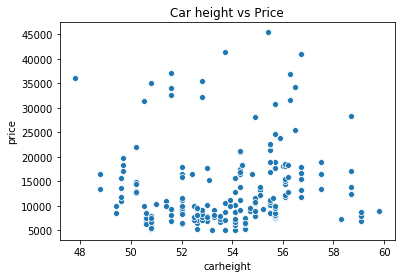

In [39]:
# Get the overall spread of car height with price
plt.title("Car height vs Price")
sns.scatterplot(x="carheight", y="price", data=cars_df)
plt.show()

***Observation***
- ```Car height``` is not having any correlation with price, so there is no influence on price.

###### 14. Curbweight

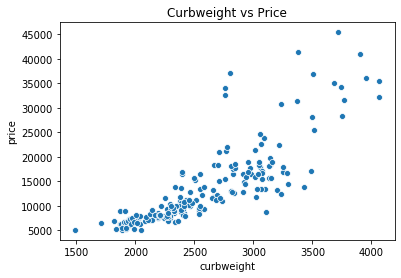

In [40]:
# Get the overall spread of curb weight with price
plt.title("Curbweight vs Price")
sns.scatterplot(x="curbweight", y="price", data=cars_df)
plt.show()

***Observation***
- ```curbweight``` is having a positive correlation with price.

###### 15. Engine Type

In [41]:
# Get unique values and its counts for enginetype
cars_df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

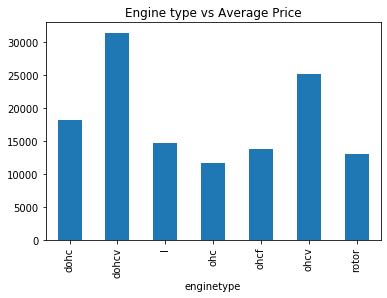

In [42]:
# Get average price across enginetype
plt.title("Engine type vs Average Price")
cars_df.groupby(by="enginetype").price.mean().plot.bar()
plt.show()

***Observations***
- ```dohcv``` and ```ohcv``` engine typed models are more expensive

###### 16. Cylinder Number

In [43]:
# Get unique values and its counts for cylindernumber
cars_df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

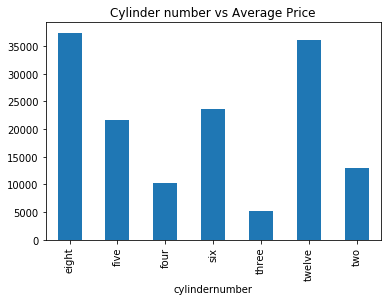

In [44]:
# Get average price across cylindernumber
plt.title("Cylinder number vs Average Price")
cars_df.groupby(by="cylindernumber").price.mean().plot.bar()
plt.show()

***Observations***
- Models having ```eight``` and ```twelve``` cylinders are expensive but the number of models in the market are less.

###### 17. Fuelsystem

In [45]:
# Get unique values and its counts for fuelsystem
cars_df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

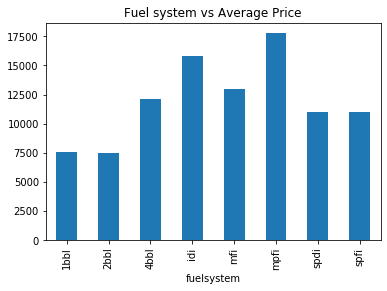

In [46]:
# Get average price across fuelsystem
plt.title("Fuel system vs Average Price")
cars_df.groupby(by="fuelsystem").price.mean().plot.bar()
plt.show()

***Observations***
- ```mpfi``` and ```idi``` fuel systemed cars are more expensive, and even the number of models in the markets are also high.

###### 18. Engine Size

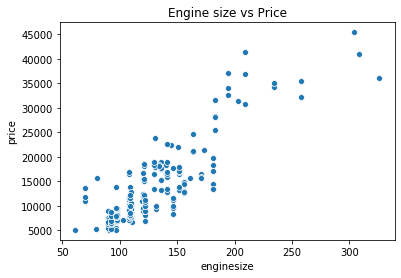

In [47]:
# Get the overall spread of engine size with price
plt.title("Engine size vs Price")
sns.scatterplot(x="enginesize", y="price", data=cars_df)
plt.show()

***Observations***
-  ```enginesize``` has got significant positive correlation with price.

###### 19. Boreratio

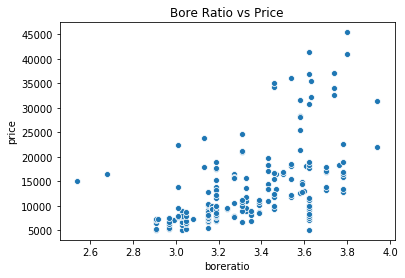

In [48]:
# Get the overall spread of boreratio with price
plt.title("Bore Ratio vs Price")
sns.scatterplot(x="boreratio", y="price", data=cars_df)
plt.show()

***Observations***
-  ```boreratio``` has got significant positive correlation with price.

###### 20. Stroke

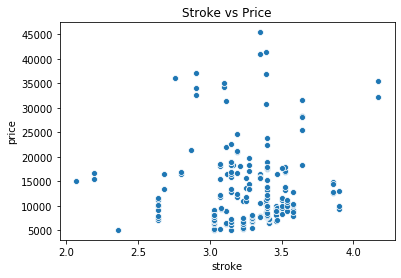

In [49]:
# Get the overall spread of stroke with price
plt.title("Stroke vs Price")
sns.scatterplot(x="stroke", y="price", data=cars_df)
plt.show()

***Observations***
-  ```stroke``` has no significant correlation and influence with price.

###### 21. Compression Ratio

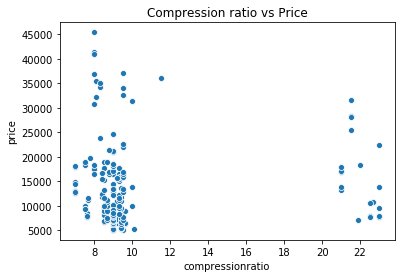

In [50]:
# Get the overall spread of compressionratio with price
plt.title("Compression ratio vs Price")
sns.scatterplot(x="compressionratio", y="price", data=cars_df)
plt.show()

***Observations***
-  ```compressionratio``` has got very low correlation and has got no influence with price.

###### 22. Horse Power

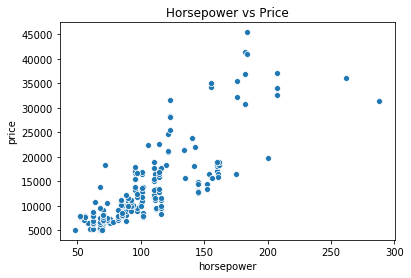

In [51]:
# Get the overall spread of horsepower with price
plt.title("Horsepower vs Price")
sns.scatterplot(x="horsepower", y="price", data=cars_df)
plt.show()

***Observations***
-  ```horsepower``` has got high positive correlation and has got significant influence with price.

###### 23. Peak RPM

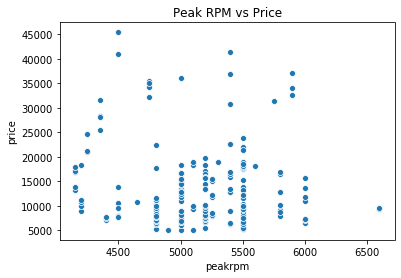

In [52]:
# Get the overall spread of peakrpm with price
plt.title("Peak RPM vs Price")
sns.scatterplot(x="peakrpm", y="price", data=cars_df)
plt.show()

***Observations***
-  ```peakrpm``` has got negative correlation with price.

###### 24 City Mileage and Highway Mileage

- From the heatmap, it is clear that ```citympg``` and ```highwaympg``` are highly correlated to each other with a value of **0.97**
- This will affect our model, so we are converting this into a **single variable** based on Federal Test Procedure.

In [53]:
# Converting city and highway mileage into single using 55% city cycle and 45%  highway cycle split.
cars_df["net_mileage"] = cars_df["citympg"] * 0.55 + cars_df["highwaympg"] * 0.45

# Removing the citympg and highwaympg after creating net mileage.
cars_df.drop(["citympg", "highwaympg"], axis=1, inplace=True)

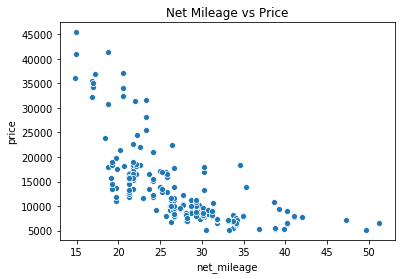

In [54]:
# Get the overall spread of mileage with price
plt.title("Net Mileage vs Price")
sns.scatterplot(x="net_mileage", y="price", data=cars_df)
plt.show()

***Observations***
-  ```net_mileage``` has got negative correlation with price.

***

In [55]:
# Get the unique car companies
print(len(cars_df.carCompany.unique()))
cars_df.carCompany.unique()

22


array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Currently the ```carCompany``` contains 22 different models or levels. We can divide this into three segments based on the average price for each car model, so that it will have lesser number of levels in the Linear Regression model.
<br>
<br>
We can divide this into ```Economic Tier```, ```Mid Tier``` and ```Luxury Tier```.

In [56]:
# Get the average price of each car company.
cars_avg_price_company = cars_df[["carCompany","price"]].groupby(
    "carCompany", as_index = False
    ).mean().rename(
        columns={"price":"averagePrice"}
    )

# Merge the average price value back into the main dataframe
cars_df = cars_df.merge(cars_avg_price_company, on="carCompany")

In [57]:
# Function to segment the carCompany as different tiers based on average price.
def car_category_func(price):
    if price < 10000:
        return "EconomicTier"
    elif price >= 10000 and price < 20000:
        return "MidTier"
    elif price >= 20000:
        return "LuxuryTier"

# Create a new column to represent the a car company belongs to which tier.
cars_df["car_category"] = cars_df["averagePrice"].apply(lambda x: car_category_func(x))

In [58]:
# Remove the carCompany and averagePrice from the dataframe as it will be represented in the category column.
cars_df.drop(["carCompany", "averagePrice"], axis=1, inplace=True)

####  2.2 Bivariate Analysis

##### Car Category vs Net Mileage

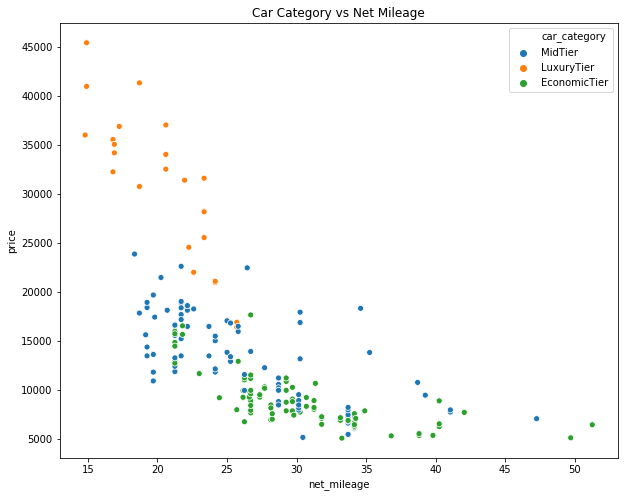

In [59]:
plt.figure(figsize=(10, 8))
plt.title("Car Category vs Net Mileage")
sns.scatterplot("net_mileage", "price", hue="car_category", data=cars_df)
plt.show()

##### Car Category vs Engine Type

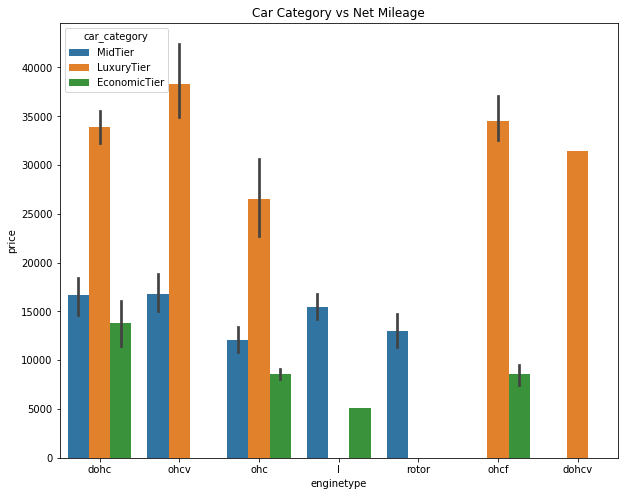

In [60]:
plt.figure(figsize=(10, 8))
plt.title("Car Category vs Net Mileage")
sns.barplot("enginetype", "price", hue="car_category", data=cars_df)
plt.show()

##### Car Category vs Car body

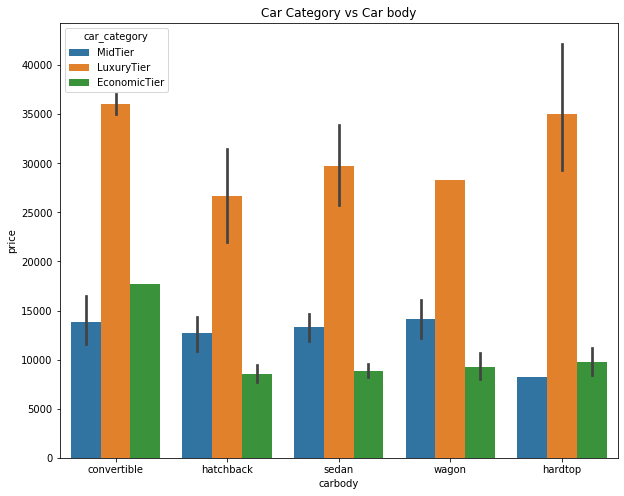

In [61]:
plt.figure(figsize=(10, 8))
plt.title("Car Category vs Car body")
sns.barplot("carbody", "price", hue="car_category", data=cars_df)
plt.show()

####  2.3 Summary on Initial Analysis

- Based on the above analysis, we can remove those variables which does not influence or affect much on the ```price``` - dependent variable. The important variables which drives the value based on the analysis are;
    - Car Category
    - Fuel Type
    - Aspiration
    - Car Body
    - Drive Wheel
    - Wheelbase
    - Car Length
    - Car Width
    - Curb weight
    - Engine Type
    - Cylinder Number
    - Engine Size
    - Bore Ratio
    - Horsepower
    - Mileage


***

### 3. Build Linear Regression Model

#### 3.1 Data Preparation

In [62]:
# Filter out the remaining columns based on the analysis.
cars_df = cars_df[
    [
        "car_category", "fueltype", "aspiration", "carbody",
        "drivewheel", "wheelbase", "carlength", "carwidth",
        "curbweight", "enginetype", "cylindernumber", "enginesize",
        "boreratio", "horsepower", "net_mileage", "price"
    ]
]

In [63]:
# Get the variables which are categorical.
cat_cols = cars_df.select_dtypes(include = ['object'])
cat_cols.head()

,car_category,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber
0,MidTier,gas,std,convertible,rwd,dohc,four
1,MidTier,gas,std,convertible,rwd,dohc,four
2,MidTier,gas,std,hatchback,rwd,ohcv,six
3,MidTier,gas,std,sedan,fwd,ohc,four
4,MidTier,gas,std,sedan,4wd,ohc,five


#### 3.2 Create Dummy variables

In [64]:
# Create dummy variables for the different levels of categorical variables
dummy_cat = pd.get_dummies(cat_cols, drop_first=True)

In [65]:
# Check wthether the dummy variables are created correctly.
dummy_cat.columns

Index(['car_category_LuxuryTier', 'car_category_MidTier', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [66]:
# Get the total columns for dummy dataframe
dummy_cat.shape

(205, 22)

In [67]:
# Concat the dummy dataframe with the master cars dataframe
cars_df = pd.concat([cars_df, dummy_cat], axis=1)
cars_df.shape

(205, 38)

In [68]:
# Remove the original catagorical columns in which dummy variables are created.
cars_df.drop(cat_cols.columns, axis=1, inplace=True)

In [69]:
# Get the shape of the dataframe after creating dummy and removing categorical variables.
cars_df.shape

(205, 31)

In [70]:
cars_df.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'net_mileage', 'price',
       'car_category_LuxuryTier', 'car_category_MidTier', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

#### 3.3 Split the data into Train and Test sets

In [71]:
# To make the data sets having same rows and columns
np.random.seed(0)
# Split the data into train and test data sets
cars_df_train, cars_df_test = train_test_split(cars_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### 3.4 Scaling and RFE

In [72]:
# Apply normalisation or minmax scaling to all the variables except the dummy variables.
scaler = MinMaxScaler()
num_vars = [
    "wheelbase", "carlength", "carwidth", "curbweight", "enginesize",
    "boreratio",  "horsepower", "price","net_mileage"
]
cars_df_train[num_vars] = scaler.fit_transform(cars_df_train[num_vars])

In [73]:
# Confirm whether the scaling got applied
cars_df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,net_mileage,price,car_category_LuxuryTier,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.358265,0.219310,0.118881,...,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.185980,0.215682,0.324786,...,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.198903,0.067298,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.344307,0.140343,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.512346,0.313479,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
# Split the data into X and y variables (y being the dependent variable)
y_train = cars_df_train.pop("price")
X_train = cars_df_train

In [75]:
# Running RFE method with required output variables as 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE to get 10 output variables.
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [76]:
# Get the list of all features with ranking based on the RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('net_mileage', True, 1),
 ('car_category_LuxuryTier', True, 1),
 ('car_category_MidTier', False, 12),
 ('fueltype_gas', False, 17),
 ('aspiration_turbo', False, 18),
 ('carbody_hardtop', False, 2),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 16),
 ('drivewheel_rwd', False, 15),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 19),
 ('enginetype_ohc', False, 7),
 ('enginetype_ohcf', False, 8),
 ('enginetype_ohcv', False, 9),
 ('enginetype_rotor', False, 20),
 ('cylindernumber_five', False, 6),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 5),
 ('cylindernumber_three', False, 14),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 21)]

In [77]:
# Get the columns which are supported by RFE.
rfeColumns = X_train.columns[rfe.support_]
rfeColumns

Index(['carwidth', 'curbweight', 'horsepower', 'net_mileage',
       'car_category_LuxuryTier', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'cylindernumber_twelve'],
      dtype='object')

In [78]:
# Get the variables which are rejected by the RFE
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'enginesize', 'boreratio',
       'car_category_MidTier', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_two'],
      dtype='object')

#### 3.5 Build Model

In [79]:
# Function to build the model based on X and y
def buildModel(X, y):
    """ Create the OLS model and get the summary.
    """
    X_sm = sm.add_constant(X) 
    lm = sm.OLS(y,X_sm).fit()
    print(lm.summary())
    return X_sm, lm

# Function to get the VIF based on the X
def checkVIF(X):
    """ Calculate the VIF for the given independent variables.
    """
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

**Approach that we take for removing features manually based on p-values and VIF (Manual Feature Selection)**
- Low p-value, Low VIF (It is good, and we can keep it)
- High p-value, High VIF ( We can remove it)
- High p-value, Low VIF (We need to analyse it and remove it based on that decision).
- Low p-value, High VIF (We need to analyse it and remove it based on that decision).

- We will follow the order from top to bottom to decide which feature has to be removed or not.
<br>
We will also remove fearures one-by-one based on the above criteria and build a new model out of it until we get the desired result.

#### Model 1

We will start building the model based on the RFE supported variables.

In [80]:
# Model 1
# Get the X based on the RFE supported columns
X_train_1 = X_train[rfeColumns]
# Build the model and get the summary stats
X_stats_1, _ = buildModel(X_train_1, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           1.29e-70
Time:                        23:15:47   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [81]:
# Calculate the VIF for the model 1
vif1 = checkVIF(X_stats_1)
vif1

,Features,VIF
0,const,71.51
2,curbweight,8.38
7,carbody_sedan,6.18
3,horsepower,5.94
6,carbody_hatchback,5.68
1,carwidth,5.19
4,net_mileage,3.74
8,carbody_wagon,3.62
9,enginetype_dohcv,1.73
5,car_category_LuxuryTier,1.68


***Observation***
- Based on the results from ```Model 1```, it seems like ```cylindernumber_twelve``` has got p-value among the other variables. So we will remove that.

#### Model 2

Drop the ```cylindernumber_twelve``` and build a new model with the remaining variables.

In [82]:
# Model 2
X_train_2 = X_stats_1.drop(["cylindernumber_twelve"], axis=1)
# Build the model and get the summary stats
X_stats_2, _ = buildModel(X_train_2, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           4.25e-71
Time:                        23:15:48   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [83]:
# Calculate VIF for model 2
vif2 = checkVIF(X_stats_2)
vif2

,Features,VIF
0,const,67.23
2,curbweight,8.33
7,carbody_sedan,6.13
6,carbody_hatchback,5.67
1,carwidth,5.19
3,horsepower,5.06
8,carbody_wagon,3.58
4,net_mileage,3.56
5,car_category_LuxuryTier,1.68
9,enginetype_dohcv,1.62


***Observation***
- Based on the results from ```Model 2```, it seems like ```net_mileage``` has got p-value among the other variables. So we will remove that.

#### Model 3

Drop the ```net_mileage``` and build a new model with the remaining variables.

In [84]:
# Model 3
X_train_3 = X_stats_2.drop("net_mileage", axis=1)
# Build the model and get the summary stats
X_stats_3, _ = buildModel(X_train_3, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           7.86e-72
Time:                        23:15:48   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [85]:
# Calculate VIF for model 3
vif3 = checkVIF(X_stats_3)
vif3

,Features,VIF
0,const,26.90
2,curbweight,8.10
6,carbody_sedan,6.07
5,carbody_hatchback,5.63
1,carwidth,5.14
3,horsepower,3.61
7,carbody_wagon,3.58
4,car_category_LuxuryTier,1.63
8,enginetype_dohcv,1.46


***Observation***
- Based on the results from ```Model 3```, it seems like ```enginetype_dohcv``` has got p-value among the other variables. So we will remove that.

#### Model 4

Drop the ```enginetype_dohcv``` and build a new model with the remaining variables.

In [86]:
X_train_4 = X_stats_3.drop("enginetype_dohcv", axis=1)
# Build the model and get the summary stats
X_stats_4, _ = buildModel(X_train_4, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           1.67e-71
Time:                        23:15:48   Log-Likelihood:                 199.31
No. Observations:                 143   AIC:                            -382.6
Df Residuals:                     135   BIC:                            -358.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [87]:
# Calculate VIF for model 4
vif4 = checkVIF(X_stats_4)
vif4

,Features,VIF
0,const,26.31
2,curbweight,6.75
6,carbody_sedan,6.07
5,carbody_hatchback,5.62
1,carwidth,4.68
7,carbody_wagon,3.52
3,horsepower,2.93
4,car_category_LuxuryTier,1.61


***Observation***
- Based on the results from ```Model 4```, it seems like ```curbweight``` has got highest VIF value. So we will remove that.

#### Model 5

Drop the ```curbweight``` and build a new model with the remaining variables.

In [88]:
X_train_5 = X_stats_4.drop("curbweight", axis=1)

# Build the model and get the summary stats
X_stats_5, _ = buildModel(X_train_5, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     218.6
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           2.86e-67
Time:                        23:15:48   Log-Likelihood:                 186.05
No. Observations:                 143   AIC:                            -358.1
Df Residuals:                     136   BIC:                            -337.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [89]:
# Calculate VIF for model 5
vif5 = checkVIF(X_stats_5)
vif5

,Features,VIF
0,const,26.23
5,carbody_sedan,6.04
4,carbody_hatchback,5.47
6,carbody_wagon,3.46
2,horsepower,2.32
1,carwidth,2.22
3,car_category_LuxuryTier,1.56


***Observation***
- Based on the results from ```Model 5```, it seems like ```carbody_sedan``` has got highest VIF value. So we will remove that.

#### Model 6

Drop the ```carbody_sedan``` and build a new model with the remaining variables.

In [90]:
X_train_6 = X_stats_5.drop("carbody_sedan", axis=1)

# Build the model and get the summary stats
X_stats_6, _ = buildModel(X_train_6, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           1.06e-66
Time:                        23:15:48   Log-Likelihood:                 181.70
No. Observations:                 143   AIC:                            -351.4
Df Residuals:                     137   BIC:                            -333.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [91]:
# Calculate VIF for model 6
vif6 = checkVIF(X_stats_6)
vif6

,Features,VIF
0,const,10.44
2,horsepower,2.22
1,carwidth,2.09
3,car_category_LuxuryTier,1.55
4,carbody_hatchback,1.20
5,carbody_wagon,1.11


***Observation***
- Based on the results from ```Model 6```, it seems like ```carbody_wagon``` has got highest p-value. So we will remove that.

#### Model 7

Drop the ```carbody_wagon``` and build a new model with the remaining variables.

In [92]:
X_train_7 = X_stats_6.drop("carbody_wagon", axis=1)

# Build the model and get the summary stats
X_stats_7, lm = buildModel(X_train_7, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           1.04e-67
Time:                        23:15:49   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [93]:
# Calculate VIF for model 7
vif7 = checkVIF(X_stats_7)
vif7

,Features,VIF
0,const,10.04
2,horsepower,2.22
1,carwidth,2.08
3,car_category_LuxuryTier,1.53
4,carbody_hatchback,1.10


***Observations***
- All the p-values for the feature variables are in good range and are acceptable.
- The VIF values for the feature variables are also under the value ```5```
- The model has got R2 value as approximately equal to ```90%```
- The model has got adjusted R2 value as approximately equal to ```89.6%```
  - It means that the model is able to predict the most of the variance without being too much complex.

#### 3.6 Residual Analysis

In [94]:
# Get the predicted value of y based on the model 7/final model.
y_train_price = lm.predict(X_stats_7)

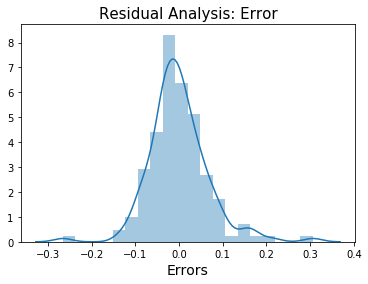

In [95]:
# Calculte the residual and plot the histogram around the error terms
fig = plt.figure()
plt.title("Residual Analysis: Error", fontsize=15)
sns.distplot((y_train - y_train_price), bins = 20)         
plt.xlabel('Errors', fontsize = 14)
plt.show()

***Observations***
- The error terms are approximately normly distributed

***

### 4. Predictions using final model

In [96]:
# Apply the scaling on the test data set 
num_vars = [
    "wheelbase", "carlength", "carwidth", "curbweight", "enginesize",
    "boreratio",  "horsepower", "price","net_mileage"
]
# Apply the scaling with the trained one, so here we are performing transform instead of fit_transform
cars_df_test[num_vars] = scaler.transform(cars_df_test[num_vars])

In [97]:
# Check whether the scaling has be done on the test data set
cars_df_test.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,net_mileage,price,car_category_LuxuryTier,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0
mean,0.437764,0.559481,0.480376,0.428470,0.265673,0.556580,0.248858,0.344661,0.239439,0.112903,...,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0
std,0.212861,0.189947,0.165440,0.179488,0.162820,0.228484,0.163376,0.175037,0.233076,0.319058,...,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0
min,0.000000,0.056911,0.183333,0.128394,0.067925,-0.111111,0.016667,0.002743,0.007763,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.313793,0.459350,0.358333,0.305275,0.177358,0.404762,0.107292,0.192387,0.092342,0.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0
50%,0.387931,0.547967,0.441667,0.406129,0.226415,0.563492,0.218750,0.326475,0.158991,0.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0
75%,0.570690,0.719919,0.516667,0.564876,0.316038,0.746032,0.295833,0.451303,0.317243,0.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0
max,1.182759,1.089431,0.975000,0.935609,0.932075,0.888889,0.662500,0.747599,1.112855,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0


In [98]:
# Get the final list of columns that we had in the final model
X_stats_7.columns

Index(['const', 'carwidth', 'horsepower', 'car_category_LuxuryTier',
       'carbody_hatchback'],
      dtype='object')

In [99]:
# Divide the test data set into X and y similar to what we done with the trained set.
y_test = cars_df_test.pop("price")
X_test = cars_df_test[
    ['carwidth', 'horsepower', 'car_category_LuxuryTier', 'carbody_hatchback'
    ]
]

# Adding a constant variable.
X_test_sm = sm.add_constant(X_test)

In [100]:
# Get the predicted value for y, dependent variable, based on the final model
y_pred = lm.predict(X_test_sm)

***

### 5. Model Evaluation

In [101]:
# Get the R2 value for the test data set with the model
r2_score(y_test, y_pred)

0.8986678382302791

***Observations***
- The ***R2 value*** for the test data set that with the final model is ```0.8987```

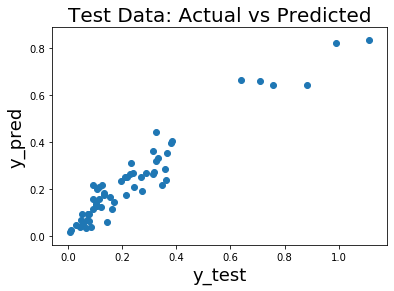

In [102]:
# Plot the graph with the actual and predicted results
plt.scatter(y_test, y_pred)
plt.title('Test Data: Actual vs Predicted', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=18)
plt.show()

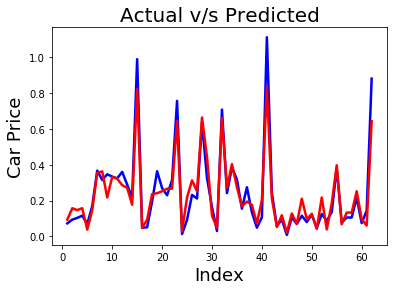

In [103]:
# Plot the graph with the actual and predicted results
columnValue = [index for index in range(1, y_pred.size + 1, 1)]
plt.title('Actual v/s Predicted', fontsize=20)   
plt.plot(columnValue, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(columnValue, y_pred, color="red",  linewidth=2.5, linestyle="-")           
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Car Price', fontsize=18)
plt.show()

***

### Summary

We can see that all our variables are in the range which is allowed, and the model looks to be stable after evaluating with train and test data sets. The most significant driving factors are;
- carwidth
- horsepower
- car_category_LuxuryTier
- carbody_hatchback

We can also see that the equation of our **best fitted line** is:

 $ price = -0.0824 + 0.3957 \times carwidth + 0.4402 \times horsepower + 0.2794 \times car\_category\_LuxuryTier - 0.0414 \times carbody\_hatchback $
